<a href="https://colab.research.google.com/github/raghavmahajan821/NLP/blob/main/e_comm_prod_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories**

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification
---



This data consists of two columns:

**Text**

**Label**


---

Example:

Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece.
-**Clothing & Accessories**


IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012
-**Electronics**


Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.
-**Books**


---



**Text**: Description of an item sold on e-commerce website.

**Label**: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
#read the data into a pandas dataframe
df=pd.read_csv('/content/Ecommerce_data.csv')
df.head(10)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories
5,Selfie: How We Became So Self-Obsessed and Wha...,Books
6,Quantum QHM8810 Keyboard with Mouse (Black) Ul...,Electronics
7,Y&S Uv Protected Non Polarized Wayfarer Boy's ...,Clothing & Accessories
8,HP external USB DVD Drive DVDRW DVD-ROM A2U56A...,Electronics
9,Fujifilm Instax Mini Monochrome Film (10 Sheet...,Books


In [4]:
df.shape

(24000, 2)

In [5]:
#check the distribution of labels
df.label.value_counts() #checking whether data is imbalanced or not

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [24]:
#Add the new column which gives a unique number to each of these labels
df['label_num']=df.label.map({
    'Household':0,
    'Electronics':1,
    'Clothing & Accessories':2,
    'Books':3
})

In [7]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [8]:
x_train,x_test,y_train,y_test=train_test_split(df.Text,df.label_num,test_size=0.2,stratify=df.label_num,random_state=42)

In [9]:
print('Shape of x_train ',x_train.shape)
print('Shape of y_train ',y_train.shape)
print('Shape of x_test ',x_test.shape)
print('Shape of y_test ',y_test.shape)

Shape of x_train  (19200,)
Shape of y_train  (19200,)
Shape of x_test  (4800,)
Shape of y_test  (4800,)


In [10]:
y_train.value_counts()

3    4800
2    4800
1    4800
0    4800
Name: label_num, dtype: int64

In [11]:
x_test.head()

10572    Deco Home Cotton Modern Arabesque Bedding, Kin...
23834    Sky Tech® High Speed External Memory Card Read...
13988    Allen Solly Men's Cotton Handkerchief Navy/Sky...
10777    Samriddhi Artificial Leaves Garlands/Creepers ...
11896    Seagate 2TB Backup Plus Slim (Blue) USB 3.0 Ex...
Name: Text, dtype: object

In [12]:
y_test.value_counts()

0    1200
1    1200
2    1200
3    1200
Name: label_num, dtype: int64

#Model:KNearest Neighbor Classifier
Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note:
*  use TF-IDF for pre-processing the text.
*  use KNN as the classifier
*  print the classification report.





In [13]:
#1. create a pipeline object
clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [14]:
#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.97      0.96      0.96      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.96      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [15]:
x_test[:5]

10572    Deco Home Cotton Modern Arabesque Bedding, Kin...
23834    Sky Tech® High Speed External Memory Card Read...
13988    Allen Solly Men's Cotton Handkerchief Navy/Sky...
10777    Samriddhi Artificial Leaves Garlands/Creepers ...
11896    Seagate 2TB Backup Plus Slim (Blue) USB 3.0 Ex...
Name: Text, dtype: object

In [16]:
y_test[:5]

10572    0
23834    1
13988    2
10777    0
11896    1
Name: label_num, dtype: int64

In [17]:
y_pred[:5]

array([0, 1, 2, 0, 1])

#Model:Naive bayes Classifier
Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note:
*  use TF-IDF for pre-processing the text.
*  use Naive bayes as the classifier
*  print the classification report.

In [18]:
#1. create a pipeline object
clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('NB',MultinomialNB())
])
#2. fit with X_train and y_train
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('NB', MultinomialNB())])

In [19]:
#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(x_test)
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.99      0.94      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.97      0.96      0.96      4800
weighted avg       0.97      0.96      0.96      4800



In [20]:
y_test[:5]

10572    0
23834    1
13988    2
10777    0
11896    1
Name: label_num, dtype: int64

In [21]:
y_pred[:5]

array([0, 1, 2, 0, 1])

#Model:Random Forest Classifier
Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note:
*  use TF-IDF for pre-processing the text.
*  use Random forest classifier as the classifier
*  print the classification report.


######Giving Better Performance over others

In [22]:
#1. create a pipeline object
clf3=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('RF',RandomForestClassifier())
])
#2. fit with X_train and y_train
clf3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier())])

In [23]:
#3. get the predictions for X_test and store it in y_pred
y_pred=clf3.predict(x_test)
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



##Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [25]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [26]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [27]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [28]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [29]:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df.preprocessed_txt,df.label_num,test_size=0.13,stratify=df.label_num,random_state=42)

**Let's check the scores with our best model till now**

*   Random Forest




In [45]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       780
           1       0.98      0.98      0.98       780
           2       0.98      0.98      0.98       780
           3       0.98      0.99      0.99       780

    accuracy                           0.98      3120
   macro avg       0.98      0.98      0.98      3120
weighted avg       0.98      0.98      0.98      3120



If we compare above classification report with respect to RandomForest Model with the one from unprocessed text, we'll find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

**Plotting Confusion matrix**

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[762   6   8   4]
 [ 10 765   0   5]
 [  5   6 766   3]
 [  3   3   5 769]]


Text(95.72222222222221, 0.5, 'Truth')

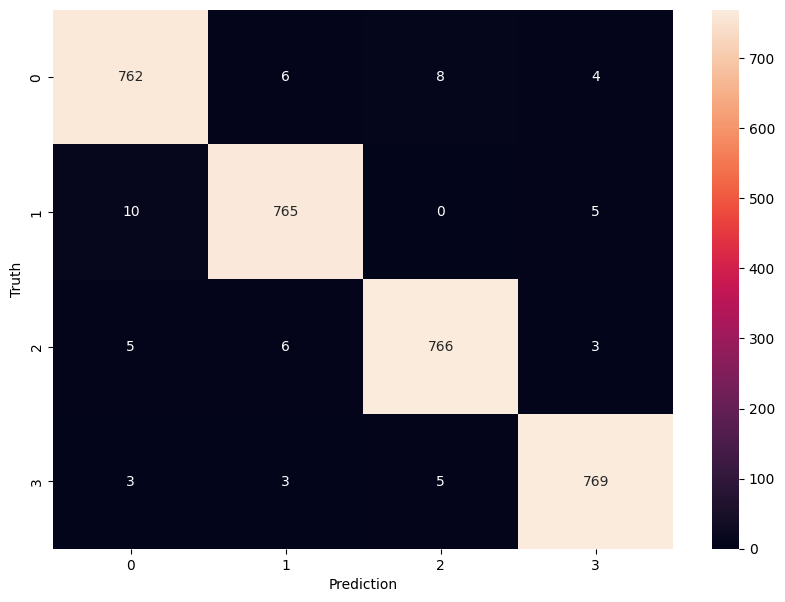

In [47]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')